# Data Analysis Interview Challenge 

# Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­ minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [6]:
df = pd.read_json('logins.json')

In [7]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [8]:
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [10]:
df.isna().sum()

login_time    0
dtype: int64

Aggregate these login counts based on 15 minute time intervals

In [11]:
# load data as a data frame
df = pd.read_json('logins.json')
# add a column to represent the number of logins during each time
df['login_count'] = 1
# convert the date to a datetime object, and set it as the index
df = df.set_index(pd.to_datetime(df['login_time'], unit='s'))[['login_count']]
# make sure everything worked
df.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [12]:
#Process time-series data into 15min 
df_agg = df.resample('15min').sum()


Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

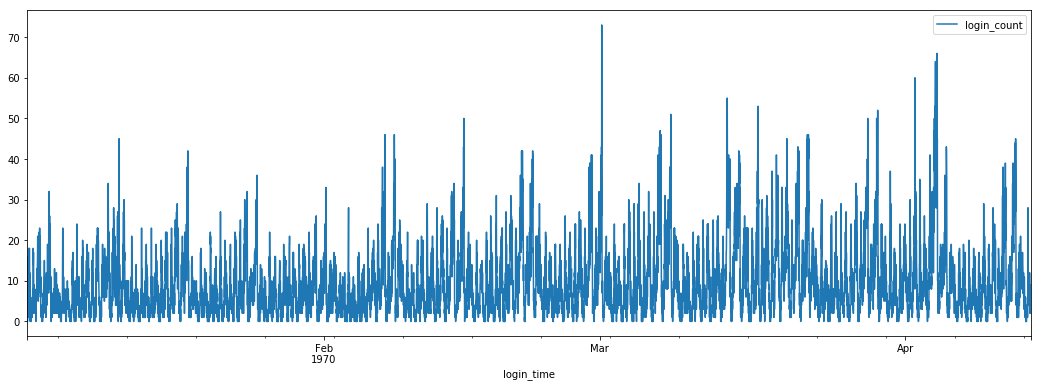

In [13]:
df_agg = df.resample('15min').sum()
df_agg.plot(kind='line', figsize=(18,6))

 It looks like there is an underlying pattern in the data, but it is hard to see at this scale. To Better understand time-series data, we should look at specefic days separately, find the busiest time of day and so on.

In [14]:
df_agg.describe()

,login_count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


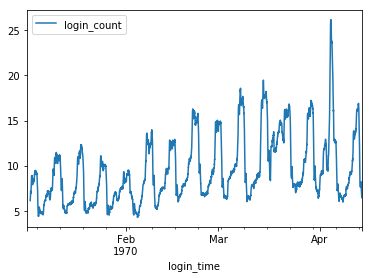

In [15]:
df_agg.rolling(window=96).mean().plot()
plt.show()

We can better see how demand rises and falls on a weekly basis.

Let's plot demand just for the month of February to see if we can get more granular insights:

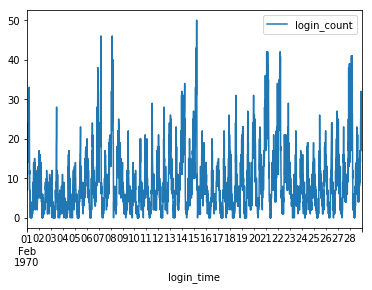

In [16]:
df_agg.loc['1970-02'].plot()
plt.show()

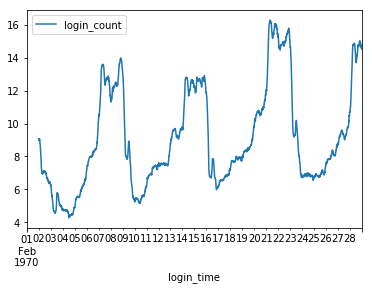

In [17]:
df_agg.loc['1970-02'].rolling(window=96).mean().plot()
plt.show()

So demand clearly rises on the weekends. There are declines in demand on the weekend as well. My guess would be the declines are due to nighttime. Let's get more granular.



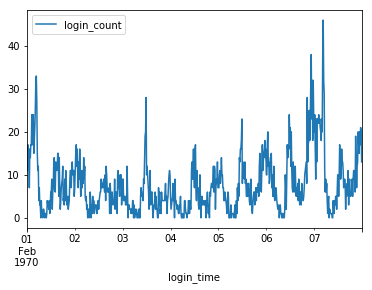

In [18]:
#Let's plot that first week.
df_agg.loc['1970-02-01':'1970-02-07'].plot()
plt.show()

we have increasing at the end of the week.

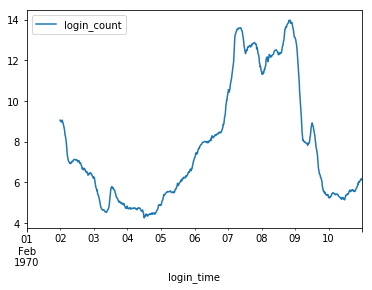

In [19]:
df_agg.loc['1970-02-01':'1970-02-10'].rolling(window=96).mean().plot()
plt.show()

Let's plot one weekend to see how demand spikes. We'll take the weekend of Friday, February 6 to Monday, February 9.

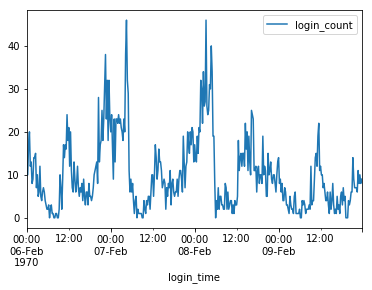

In [20]:
df_agg.loc['1970-02-06':'1970-02-09'].plot()
plt.show()

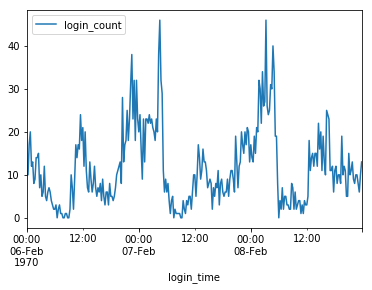

In [21]:

df_agg.loc['1970-02-06':'1970-02-08'].plot()
plt.show()

So it looks like the demand is greatest around midnight on the weekends

Let' plot two weekdays.

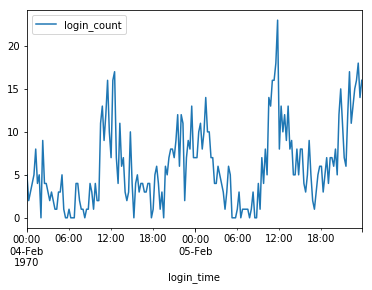

In [22]:
df_agg.loc['1970-02-04':'1970-02-05'].plot()
plt.show()


Demand is highest at noon, and at midnight.

Let's take April 3rd and April 4th.

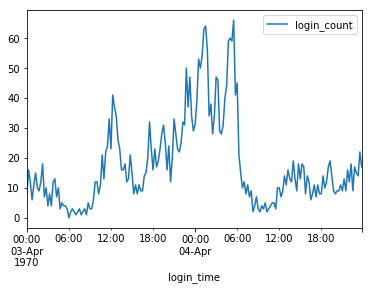

In [23]:
df_agg.loc['1970-04-03':'1970-04-04' ].plot()
plt.show()

demand is highest at noon and and midnight.
So we can reach 2 broad conclusions from our exploration:

- Demand is greater on the weekends than during the week.
- Demand is greatest around midnight and noon for both weekdays and weekends.

# Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Answer:The key metric I would use is change in weekday activity. Specifically, during the daytime hours on weekdays, is there an increase of cars entering the bridge from Gotham AND during the night is there an increase of cars entering the bridge from Metropolis. I choose this metric because it required only two assumptions, is easily measured, and doesn't require waiting for reimbursement data to accumulate.
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

   a.how you will implement the experiment
   
   Answer:I would tracked their trip per city,Which cities are they spending the majority of their time.
   
   
   b.what statistical test(s) you will conduct to verify the significance of the observation
   
   Answer:I would choose a null hypothesis that there is no difference in the mean number of crossing.
   I would test using a z-test and reject the null hypothesis.
   
   c.how you would interpret the results and provide recommendations to the city operations team along with any caveats.
   
   Answer:The test would actually need to be conducted independently for both directions on the bridge. If both resulted in the null hypothesis not being rejected, then I would recommend that the cities look for a different incentive and drop the reimbursement test. If both are rejected, then my recommendation would be that the reimbursement program appears to have achieved its sucssess. 

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.


   1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
   2.  Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
   3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­ term rider retention (again, a few sentences will suffice).
   
Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday   


# 1. Data Load, Cleaning, EDA

In [98]:
# read the ultimate_data_challenge file
with open('ultimate_data_challenge.json') as f:
     data = json.load(f)

In [101]:
# load into DataFrame
from pandas.io.json import json_normalize
df_ultimate = json_normalize(data)
df_ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [102]:
df_ultimate.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00


In [103]:
# convert dates to datetime
df_ultimate.signup_date = pd.to_datetime(df_ultimate.signup_date)
df_ultimate.last_trip_date = pd.to_datetime(df_ultimate.last_trip_date)

In [104]:
# set the missing ratings data to the column means
df_ultimate.avg_rating_by_driver.fillna(df_ultimate.avg_rating_by_driver.mean(), inplace=True)
df_ultimate.avg_rating_of_driver.fillna(df_ultimate.avg_rating_of_driver.mean(), inplace=True)

In [105]:
# set the missing values for phone to other
df_ultimate.phone.fillna('Other', inplace=True)
df_ultimate.phone.value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

In [106]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [110]:
# calculate extract date as maximum last_trip_date and then set active to True if within 30 days
from datetime import timedelta

extract_dt = max(df_ultimate.last_trip_date) 
df_ultimate['active'] = df_ultimate.last_trip_date > (extract_dt-timedelta(days=30))

In [111]:
# calculate and display the fraction of retained users
print("Percent of observed users retained: ", 100*len(df_ultimate[df_ultimate.active==True]) / len(df_ultimate))

Percent of observed users retained:  36.62


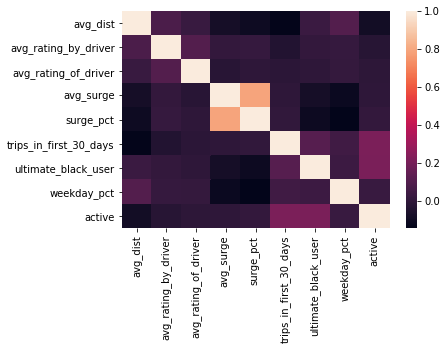

In [112]:
# create heatmap of dataset 
fig = plt.figure()
ax = plt.subplot(111)
corr = df_ultimate.corr()
ax = sns.heatmap(corr)
plt.show()

In [113]:
# now look at correlations for active
corr.active.sort_values(ascending=False)

active                    1.000000
trips_in_first_30_days    0.214728
ultimate_black_user       0.210259
weekday_pct               0.026413
surge_pct                 0.010612
avg_surge                -0.003567
avg_rating_of_driver     -0.010082
avg_rating_by_driver     -0.025595
avg_dist                 -0.090279
Name: active, dtype: float64

In [114]:
# examine fields with object type
print("city: ", df_ultimate['city'].unique())
print("phone: ", df_ultimate['phone'].unique())
print("ultimate_black_user: ", df_ultimate['ultimate_black_user'].unique())

city:  ["King's Landing" 'Astapor' 'Winterfell']
phone:  ['iPhone' 'Android' 'Other']
ultimate_black_user:  [ True False]


In [115]:
# replace categorical columns, city and phone, with dummy variables
df_ultimate = pd.get_dummies(df_ultimate, columns = ['city', 'phone'])

In [116]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null bool
city_Astapor              50000 non-null uint8
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_Android             50000 non-null uint8
phone_Other               50000 non-null uint8
phone_iPhone              50000 non-null uint8
dtypes: bool(2), datetime64[ns](2), float64(6), int64(1), uint8(

In [117]:
#convert ultimate_black_user to an integer (0=False, 1=True)
df_ultimate.ultimate_black_user = df_ultimate.ultimate_black_user.astype(int)

In [118]:
# convert date fields to int
df_ultimate['days_since_signup']= extract_dt - df_ultimate.signup_date
df_ultimate['days_since_signup']= df_ultimate['days_since_signup'].dt.days

In [119]:
# now look at correlations for active
corr = df_ultimate.corr()
corr.active.sort_values(ascending=False)

active                    1.000000
city_King's Landing       0.268272
phone_iPhone              0.231391
trips_in_first_30_days    0.214728
ultimate_black_user       0.210259
weekday_pct               0.026413
days_since_signup         0.020572
surge_pct                 0.010612
avg_surge                -0.003567
phone_Other              -0.007032
avg_rating_of_driver     -0.010082
avg_rating_by_driver     -0.025595
city_Winterfell          -0.046985
avg_dist                 -0.090279
city_Astapor             -0.179373
phone_Android            -0.231731
Name: active, dtype: float64

In [120]:
# from heatmap, you can see that avg_surge and surge_pct are highly correlated, so drop one
# also drop the signup_date since it has been transformed to days_since_signup
# finally, drop the last_trip_date since it was used to calculate Active
df_ultimate.drop(['surge_pct','signup_date','last_trip_date'],inplace=True,axis=1)

In [121]:
# create feature set (X) and target variable (y)
X = df_ultimate.drop('active',axis=1)
y = df_ultimate.active

In [122]:
# save X column names for display later on
save_X_columns  = X.columns

In [123]:
# scale the features
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [129]:
# model01 - Logistic Regression
logreg = LogisticRegression(random_state=57) 
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

[[8178 1333]
 [2768 2721]]


C:\Users\arna_mora\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=[False, True] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Text(0, 0.5, 'Actual')

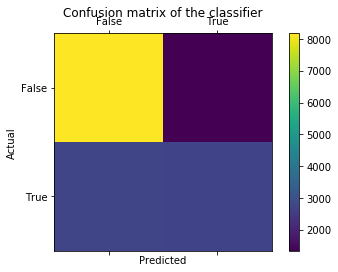

In [130]:
# print confusion matrix
labels = [False, True]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [131]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.75      0.86      0.80      9511
        True       0.67      0.50      0.57      5489

    accuracy                           0.73     15000
   macro avg       0.71      0.68      0.68     15000
weighted avg       0.72      0.73      0.72     15000



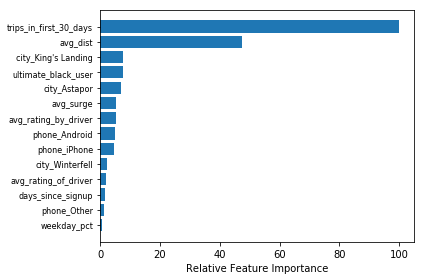

In [132]:
feature_importance = abs(model01.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(save_X_columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [133]:
# model02 - Decision Tree
DT = DecisionTreeClassifier(random_state=57) 
DT.fit(X_train, y_train)
y_pred02 = DT.predict(X_test)

In [134]:
cm02 = confusion_matrix(y_test, y_pred02, labels)
print(cm02)
print(classification_report(y_test,y_pred02))

[[7297 2214]
 [2188 3301]]
              precision    recall  f1-score   support

       False       0.77      0.77      0.77      9511
        True       0.60      0.60      0.60      5489

    accuracy                           0.71     15000
   macro avg       0.68      0.68      0.68     15000
weighted avg       0.71      0.71      0.71     15000



C:\Users\arna_mora\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=[False, True] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [136]:
# model03 - Support Vector Machine
from sklearn.svm import SVC
svc = SVC(random_state=57)
svc.fit(X_train, y_train)
y_pred03 = svc.predict(X_test)

In [138]:
cm03 = confusion_matrix(y_test, y_pred03, labels)
print(cm03)
print(classification_report(y_test, y_pred03))

[[7743 1768]
 [2097 3392]]
              precision    recall  f1-score   support

       False       0.79      0.81      0.80      9511
        True       0.66      0.62      0.64      5489

    accuracy                           0.74     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.74      0.74      0.74     15000



In [139]:
# model04 - Naive Bayes
NB = GaussianNB() 
NB.fit(X_train, y_train)
y_pred04 = NB.predict(X_test)

In [141]:
cm04 = confusion_matrix(y_test, y_pred04, labels)
print(cm04)
print(classification_report(y_test, y_pred04))

[[6770 2741]
 [1683 3806]]
              precision    recall  f1-score   support

       False       0.80      0.71      0.75      9511
        True       0.58      0.69      0.63      5489

    accuracy                           0.71     15000
   macro avg       0.69      0.70      0.69     15000
weighted avg       0.72      0.71      0.71     15000



C:\Users\arna_mora\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=[False, True] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [146]:
# model05 - Random Forest

RF = RandomForestClassifier(random_state=57)
RF.fit(X_train, y_train)
y_pred05 = RF.predict(X_test)

In [154]:
cm05 = confusion_matrix(y_test, y_pred05, labels)
print(cm05)
print(classification_report(y_test, y_pred05))

[[8105 1406]
 [1975 3514]]
              precision    recall  f1-score   support

       False       0.80      0.85      0.83      9511
        True       0.71      0.64      0.68      5489

    accuracy                           0.77     15000
   macro avg       0.76      0.75      0.75     15000
weighted avg       0.77      0.77      0.77     15000



C:\Users\arna_mora\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=[False, True] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


# Tune the Hyperparameters of the best classifier

The Random Forest had the highest accuracy score and the second lowest number of false positives

In [150]:
# First create the base model to tune
RF2 = RandomForestClassifier()

# Set up grid search of hyperparameters
random_grid = {"max_features": ['auto', 'sqrt'],
               "max_depth": [1,10,20,30,40,50,60,70,80,90,100, None],
               "min_samples_leaf": [1,3,10],
               "min_samples_split": [2,5,10],
               "bootstrap": [True, False],
               "n_estimators": [10,100]}
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF2, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=10, random_state=42, n_jobs = -1)

In [151]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   51.8s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100]},
                   random_state=42, verbose=10)

In [152]:
# display best parameters
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

# Fit the Model to the Training Set

In [155]:
# rerun model with best parameters
RF3 = RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=10, min_samples_split=2, n_estimators=100, max_features='auto')
model51 = RF3.fit(X_train,y_train)

In [158]:
y_pred51 = model51.predict(X_test)

In [159]:
# show model results
cm51 = confusion_matrix(y_test, y_pred51, labels)
print(cm51)
print(classification_report(y_test,y_pred51))

[[8278 1233]
 [1945 3544]]
              precision    recall  f1-score   support

       False       0.81      0.87      0.84      9511
        True       0.74      0.65      0.69      5489

    accuracy                           0.79     15000
   macro avg       0.78      0.76      0.76     15000
weighted avg       0.78      0.79      0.78     15000



C:\Users\arna_mora\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=[False, True] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


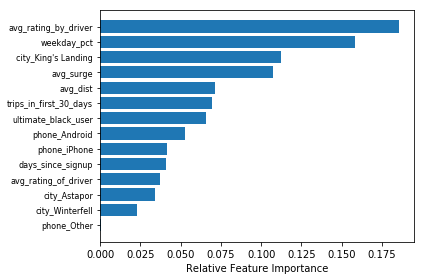

In [160]:
# get importance
importance = model62.feature_importances_

sorted_idx = np.argsort(importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(save_X_columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

# conclusion

This model can predict with a 79% accuracy whether riders who sign up within a six month period will still be active during the final month of that six month period.The most important feature in rider retention was the driver's rating of the rider. Ultimate probably does not have control over the type of rider but they can use this information to target the highly rated riders. The second most important feature, weekday percentage of trips, would suggest that Ultimate encourage new riders who start with weekend rides to use Monday-Friday rides. 
